In [195]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(sns.__version__)

0.11.2


In [2]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

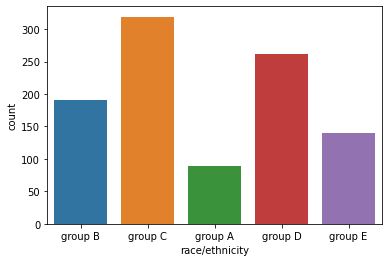

In [3]:
sns.countplot(x='race/ethnicity', data=student)

<AxesSubplot:xlabel='count', ylabel='race/ethnicity'>

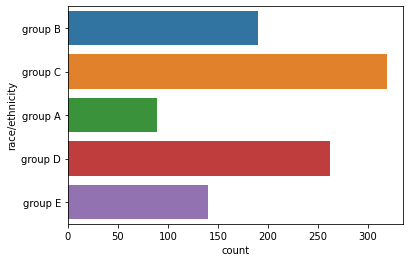

In [4]:
sns.countplot(y='race/ethnicity',data=student)

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

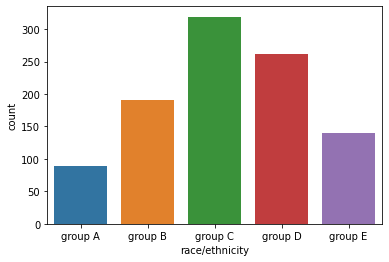

In [13]:
sns.countplot(x='race/ethnicity',
              data=student,
              order=sorted(student['race/ethnicity'].unique()),
              # order=sorted(set(student['race/ethnicity'])),
             )

# unique or set? 
# for numerical types, unique is *much* faster - about tenfold
# for string types, set is a bit faster, but not significantly

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

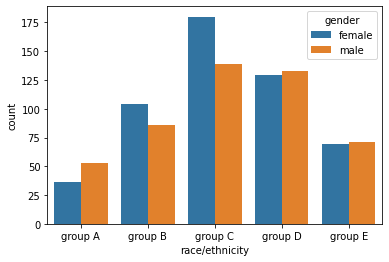

In [25]:
sns.countplot(x='race/ethnicity',
              data=student,
              hue='gender',
              order=sorted(student['race/ethnicity'].unique()),
             )

<AxesSubplot:xlabel='gender', ylabel='count'>

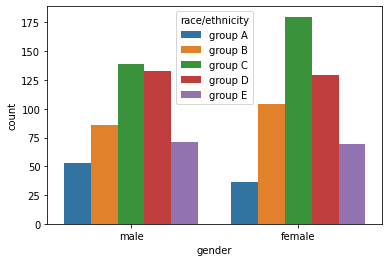

In [24]:
sns.countplot(x='gender',
              data=student,
              hue='race/ethnicity',
              hue_order=sorted(student['race/ethnicity'].unique()),
              order=['male', 'female'],
             )

<AxesSubplot:xlabel='gender', ylabel='count'>

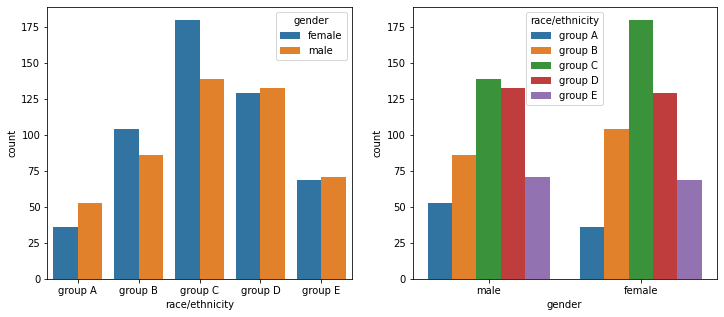

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='race/ethnicity',
              data=student,
              hue='gender',
              order=sorted(student['race/ethnicity'].unique()),
              ax=axes[0]
             )

sns.countplot(x='gender',
              data=student,
              hue='race/ethnicity',
              hue_order=sorted(student['race/ethnicity'].unique()),
              order=['male', 'female'],
              ax=axes[1]
             )

##  boxplot

In [27]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


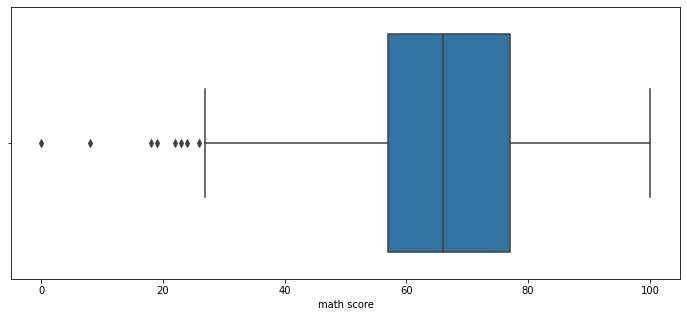

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(x='math score', data=student, ax=ax)
plt.show()

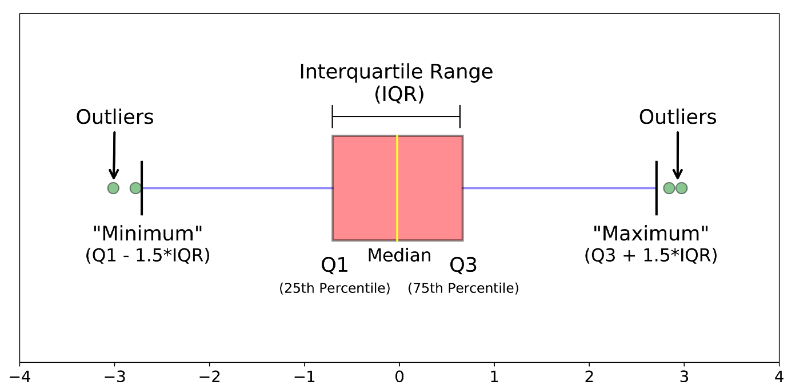

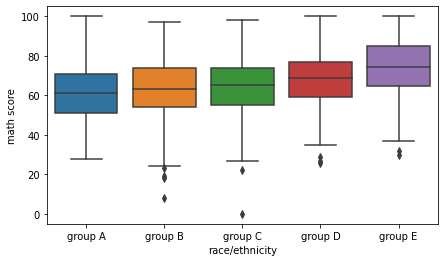

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.boxplot(x='race/ethnicity', 
            y='math score',
            data=student,
            order=sorted(student['race/ethnicity'].unique()),
            ax=ax)
plt.show()

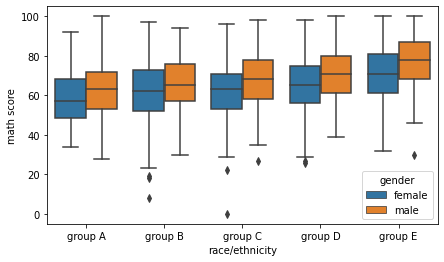

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.boxplot(x='race/ethnicity', 
            y='math score',
            data=student,
            hue='gender',
            order=sorted(student['race/ethnicity'].unique()),
            ax=ax)
plt.show()

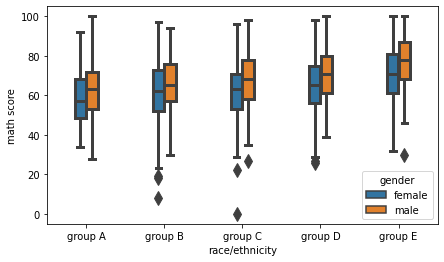

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.boxplot(x='race/ethnicity', 
            y='math score',
            data=student,
            hue='gender',
            order=sorted(student['race/ethnicity'].unique()),
            width=0.3,
            linewidth=3,
            fliersize=10, # outliers size
            ax=ax)
plt.show()

## violinplot

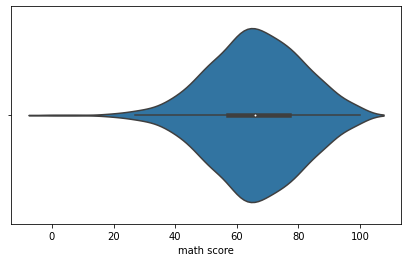

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.violinplot(x='math score',
              data=student,
              ax=ax,
              # bw=0.1,
              # cut=0,
              # inner='quartile'
              )
plt.show()

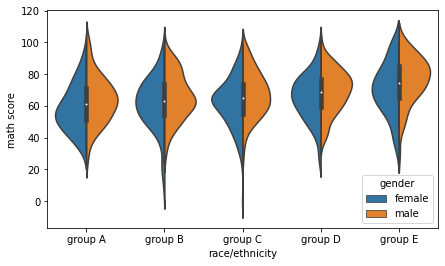

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
sns.violinplot(x='race/ethnicity',
              y='math score',
              data=student,
              ax=ax,
              hue='gender',
              split=True,
              order=sorted(student['race/ethnicity'].unique())
              )
plt.show()

## boxenplot, swarmplot, stripplot

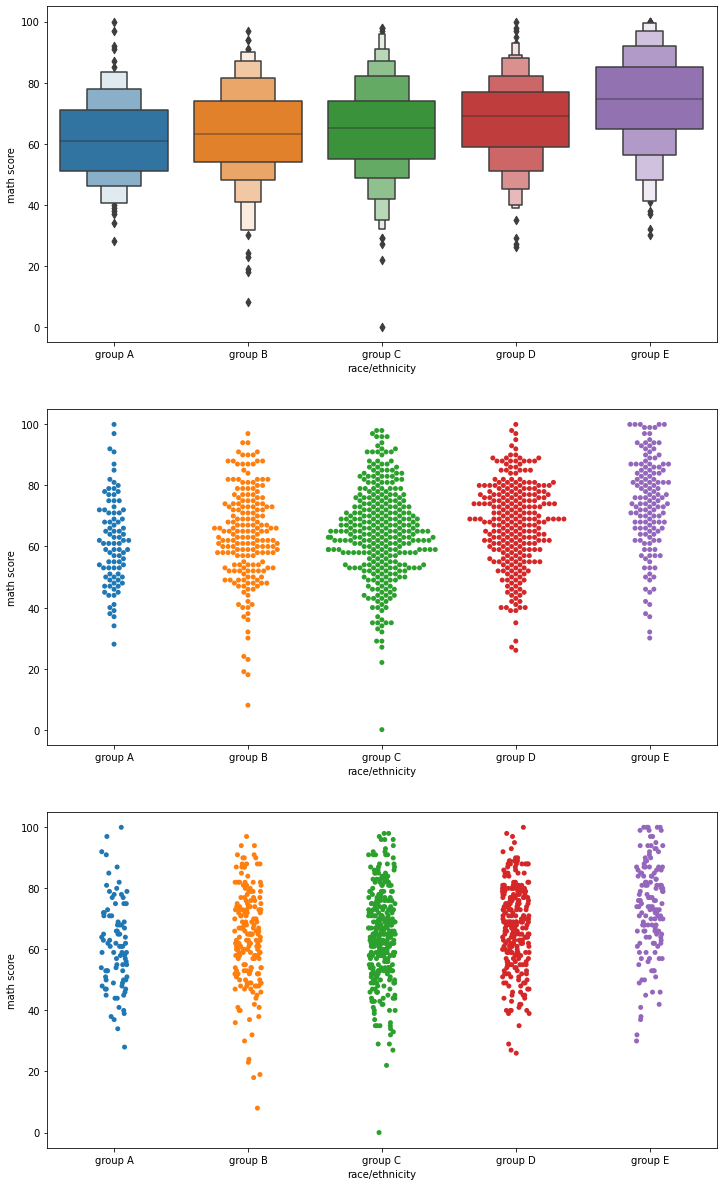

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(12, 21))

sns.boxenplot(x='race/ethnicity', 
              y='math score', 
              data=student, 
              ax=axes[0],
              order=sorted(student['race/ethnicity'].unique()))

sns.swarmplot(x='race/ethnicity', 
              y='math score', 
              data=student, 
              ax=axes[1],
              order=sorted(student['race/ethnicity'].unique()))

sns.stripplot(x='race/ethnicity', 
              y='math score', 
              data=student, 
              ax=axes[2],
              order=sorted(student['race/ethnicity'].unique()))
plt.show()

## histplot, kdeplot, ecdplot, rugplot

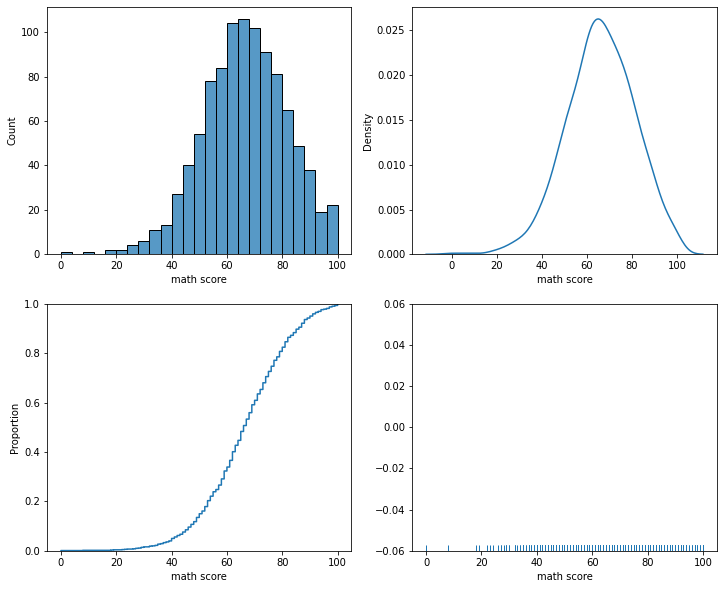

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# axes = axes.flatten()

sns.histplot(x='math score', 
             data=student, 
             ax=axes[0][0],
            )

sns.kdeplot(x='math score', 
            data=student, 
            ax=axes[0][1])

sns.ecdfplot(x='math score', 
             data=student, 
             ax=axes[1][0])

sns.rugplot(x='math score', 
            data=student, 
            ax=axes[1][1])

plt.show()

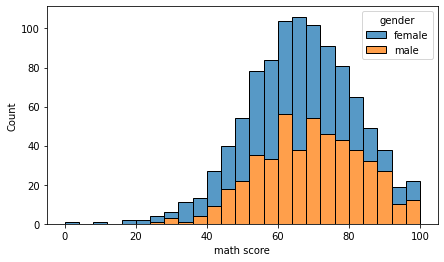

In [70]:
fig, ax = plt.subplots(figsize=(7, 4))

sns.histplot(x='math score',
            data=student,
            ax=ax,
            hue='gender',
            multiple='stack', # layer, dodge, stack, fill
            
            # binwidth=10, # 막대 간격
            # bins=100, # 막대 개수
             
            # element='poly'
            )
plt.show()

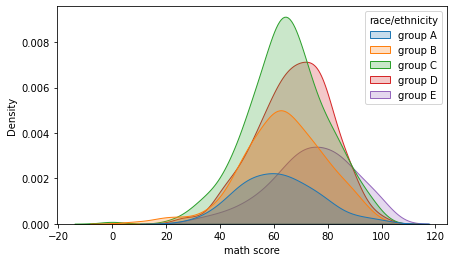

In [76]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.kdeplot(x='math score', 
            data=student, 
            ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()), 
            # bw_method=0.1 # 더 자세한 표현
           )
plt.show()

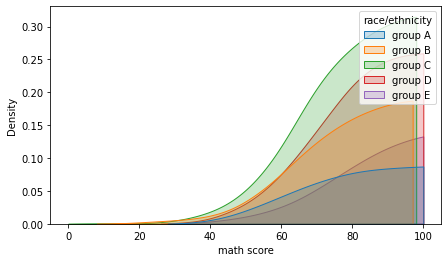

In [80]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.kdeplot(x='math score', 
            data=student, 
            ax=ax,
            fill=True, 
            hue='race/ethnicity', 
            hue_order=sorted(student['race/ethnicity'].unique()),
            multiple="layer", # layer, stack, fill
            cumulative=True,
            cut=0
           )
plt.show()

## histplot, kdeplot - bivariate distribution

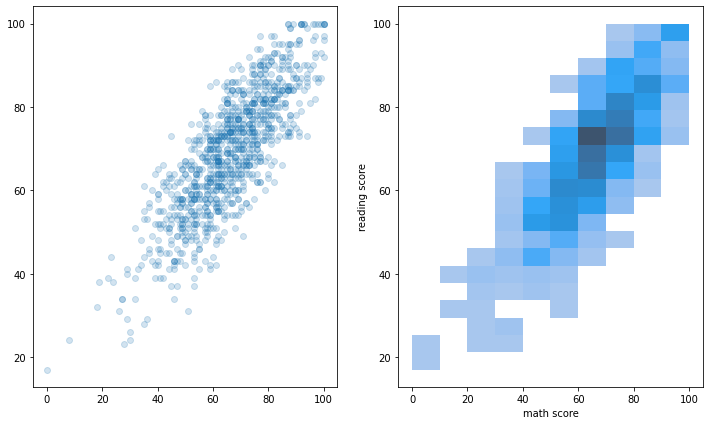

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
ax.set_aspect(1)

axes[0].scatter(student['math score'], 
                student['reading score'], 
                alpha=0.2)

sns.histplot(x='math score', 
             y='reading score', 
             data=student, 
             ax=axes[1],
             # color='orange',
             cbar=False,
             bins=(10, 20), 
            )

plt.show()

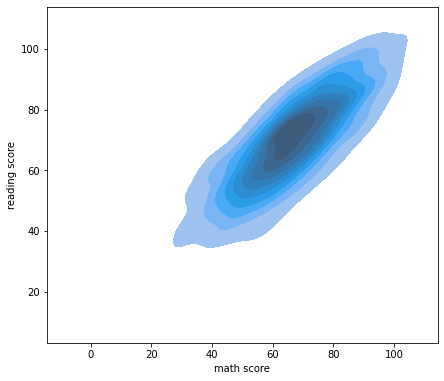

In [84]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect(1)

sns.kdeplot(x='math score', 
            y='reading score', 
            data=student, 
            ax=ax,
            fill=True,
            # bw_method=0.1
            )

plt.show()

## scatterplot

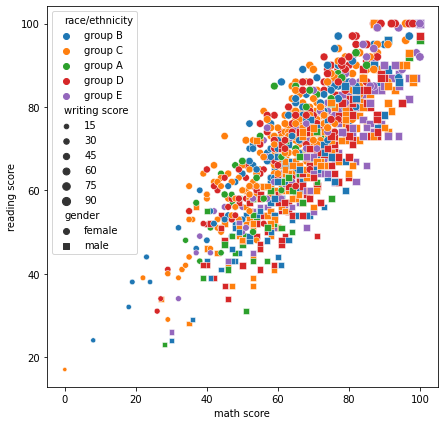

In [90]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x='math score', 
                y='reading score', 
                data=student,
                style='gender', 
                markers={'male':'s', 'female':'o'},
                hue='race/ethnicity', 
                size='writing score',
               )
plt.show()

## lineplot

In [154]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [155]:
flights_wide = flights.pivot(index="year", 
                             columns="month", 
                             values="passengers")

flights_wide.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


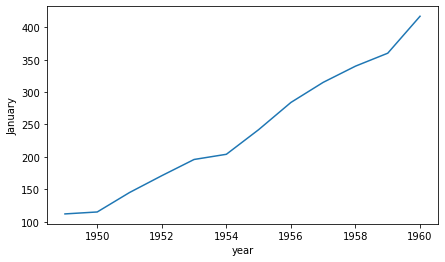

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.lineplot(x='year', 
             y='January',
             data=flights_wide, 
             ax=ax)
plt.show()

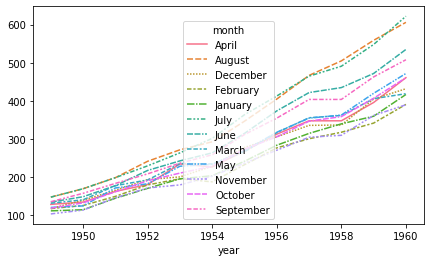

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.lineplot(data=flights_wide, 
             ax=ax)

plt.show()

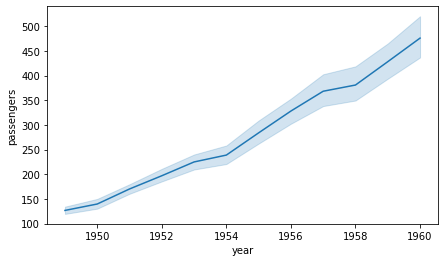

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.lineplot(data=flights, 
             x="year", 
             y="passengers", 
             ax=ax)

plt.show()

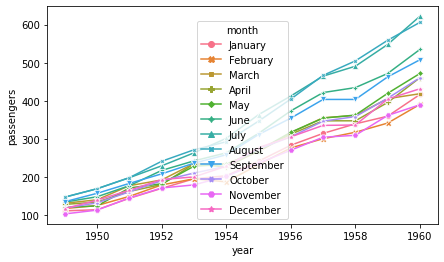

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

sns.lineplot(data=flights, 
             x="year", 
             y="passengers", 
             hue='month', 
             style='month', 
             markers=True, 
             dashes=False,
             ax=ax)
plt.show()

## regplot

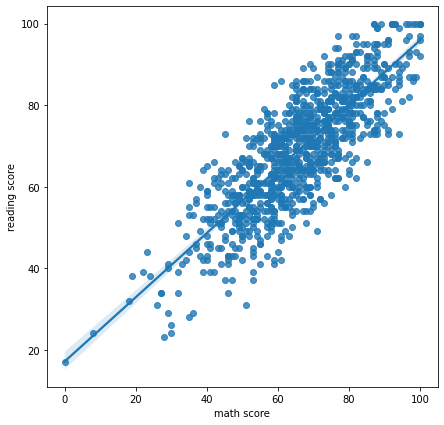

In [106]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.regplot(x='math score', 
            y='reading score', 
            data=student,
           )
plt.show()

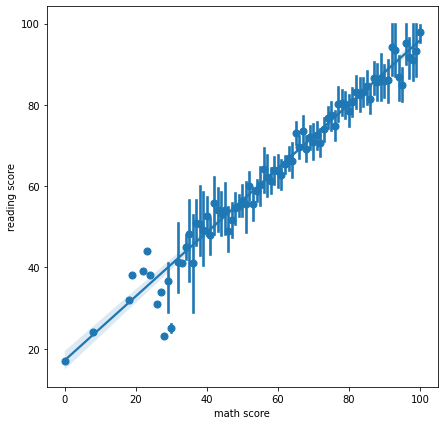

In [107]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.regplot(x='math score', 
            y='reading score', 
            data=student,
            x_estimator=np.mean
           )
plt.show()

## heatmap

In [108]:
student.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [109]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


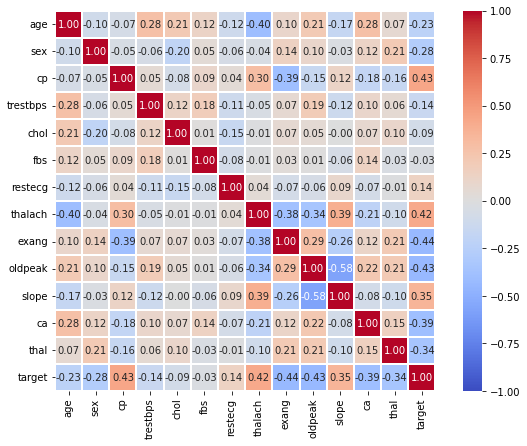

In [123]:
fig, ax = plt.subplots(1, 1 ,figsize=(10, 7))
sns.heatmap(heart.corr(), 
            ax=ax,
            vmin=-1,
            vmax=1,
            center=0,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidth=0.1,
            square=True,
           )
plt.show()

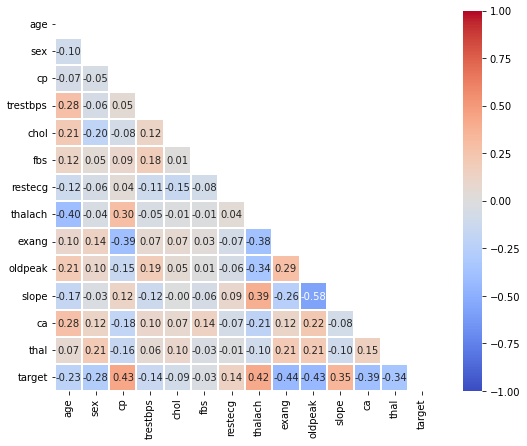

In [124]:
fig, ax = plt.subplots(1, 1 ,figsize=(10, 7))

mask = np.zeros_like(heart.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heart.corr(), 
            ax=ax,
            vmin=-1,
            vmax=1,
            center=0,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidth=0.1,
            square=True,
            mask=mask
           )
plt.show()

## jointplot

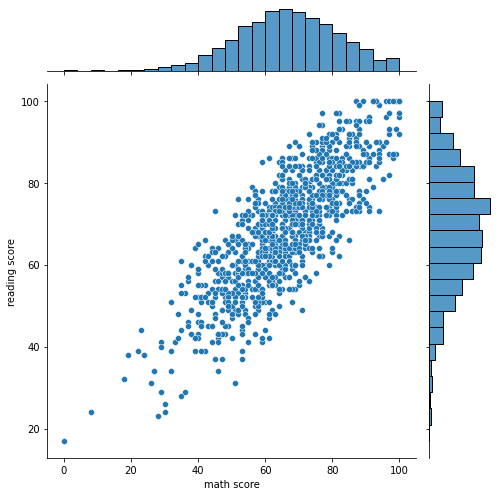

In [157]:
sns.jointplot(x='math score', 
              y='reading score',
              data=student,
              height=7)

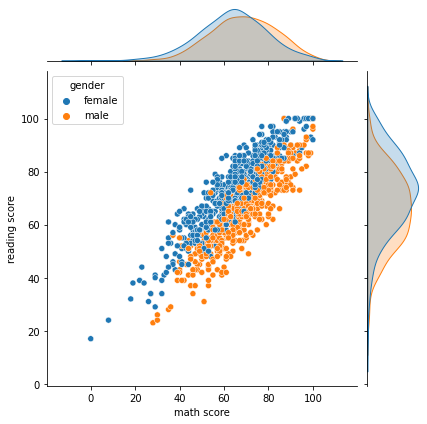

In [158]:
sns.jointplot(x='math score', 
              y='reading score',
              data=student,
              hue='gender'
             )

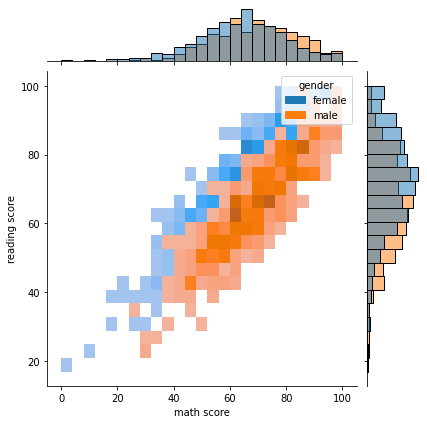

In [175]:
sns.jointplot(x='math score', 
              y='reading score',
              data=student,
              hue='gender', 
              kind='hist', # scatter, kde, hist, hex, reg, resid
              # fill=True
             )

## pairplot

In [177]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


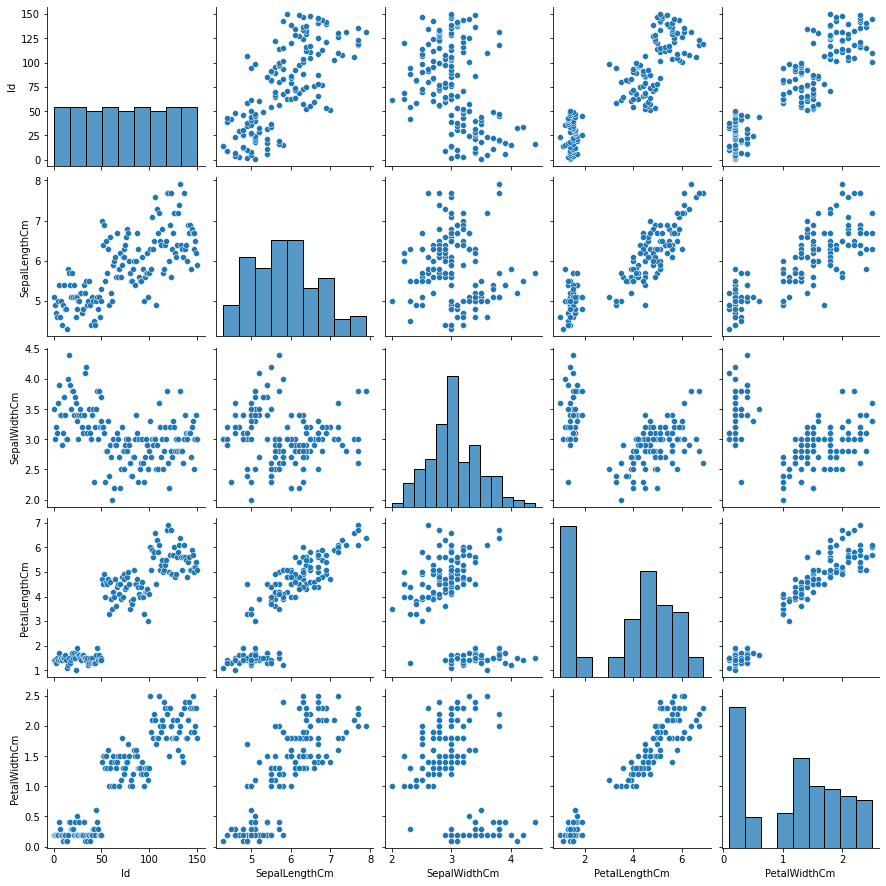

In [179]:
sns.pairplot(data=iris)

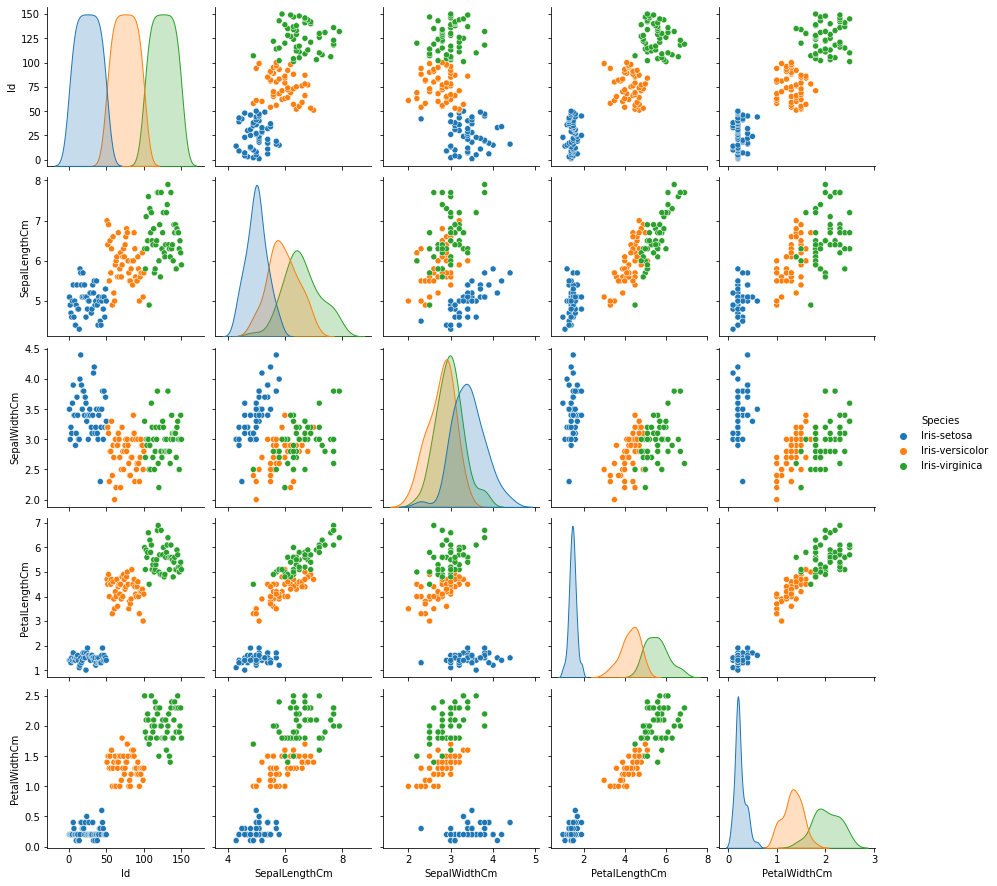

In [180]:
sns.pairplot(data=iris, hue='Species')

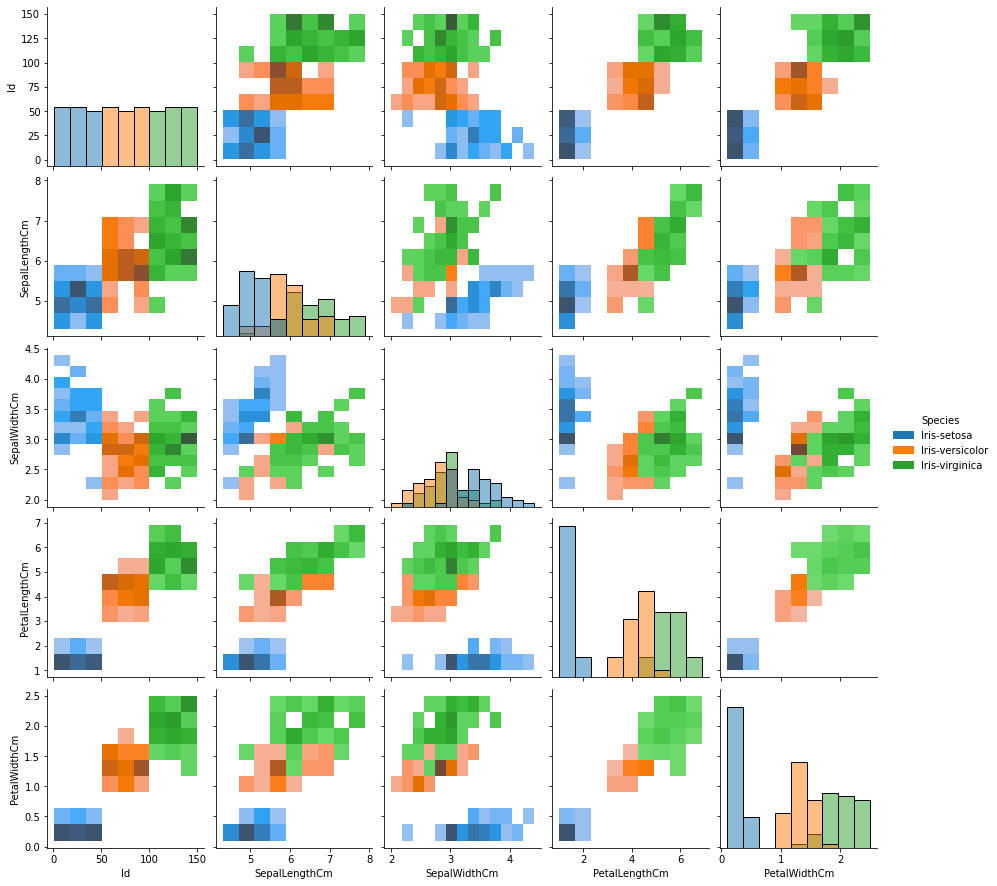

In [181]:
sns.pairplot(data=iris, hue='Species', kind='hist')

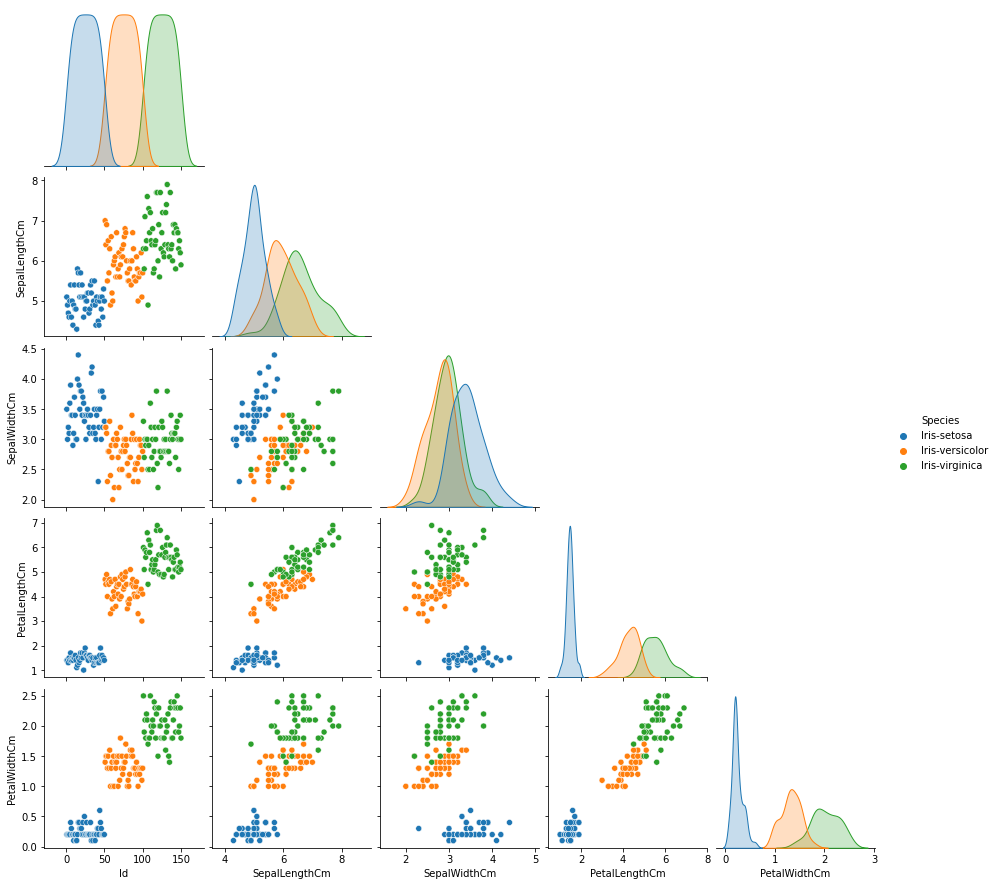

In [182]:
sns.pairplot(data=iris, hue='Species', corner=True)

## catplot: categorical

In [183]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


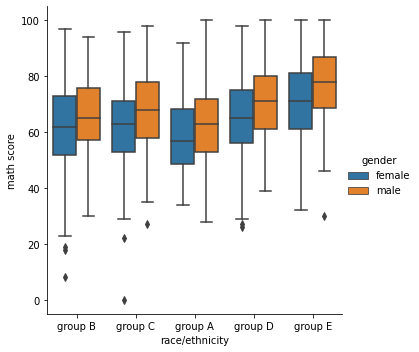

In [185]:
sns.catplot(x="race/ethnicity", 
            y="math score", 
            hue="gender", 
            data=student,
            kind='box'
           )

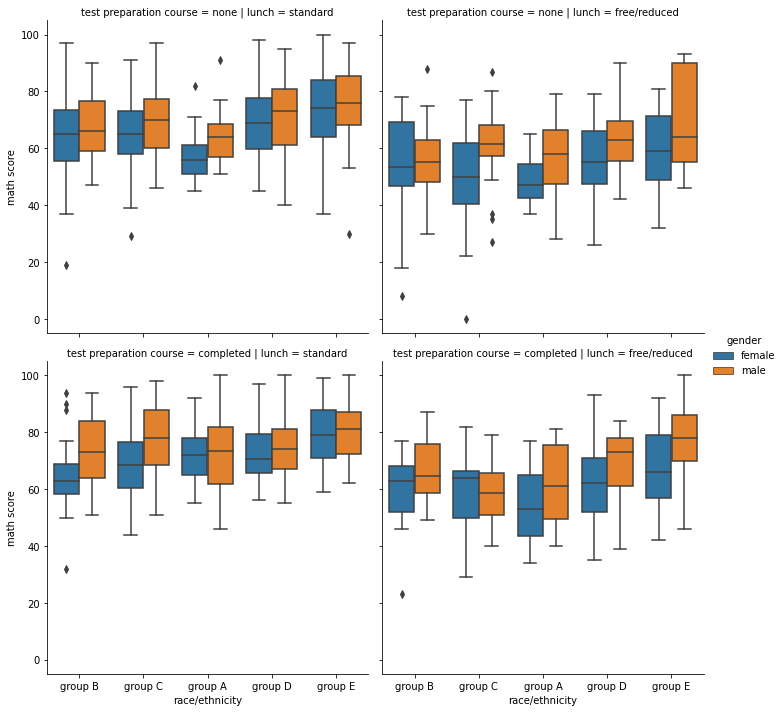

In [191]:
# 카테고리별로

sns.catplot(x="race/ethnicity", 
            y="math score", 
            hue="gender", 
            data=student,
            kind='box', 
            # categorical scatter plots: strip (default), swarm
            # categorical distribution plots: box, violin, boxen
            # categorical estimate plots: point, bar, count
            
            col='lunch', 
            row='test preparation course'
           )

## displot: distribution

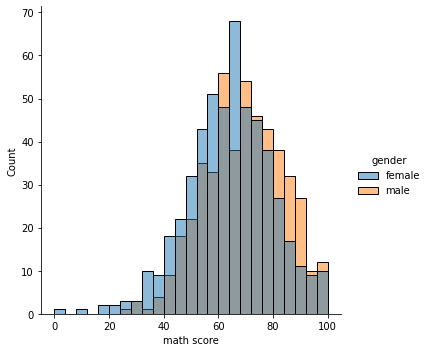

In [187]:
sns.displot(x="math score", hue="gender", data=student)

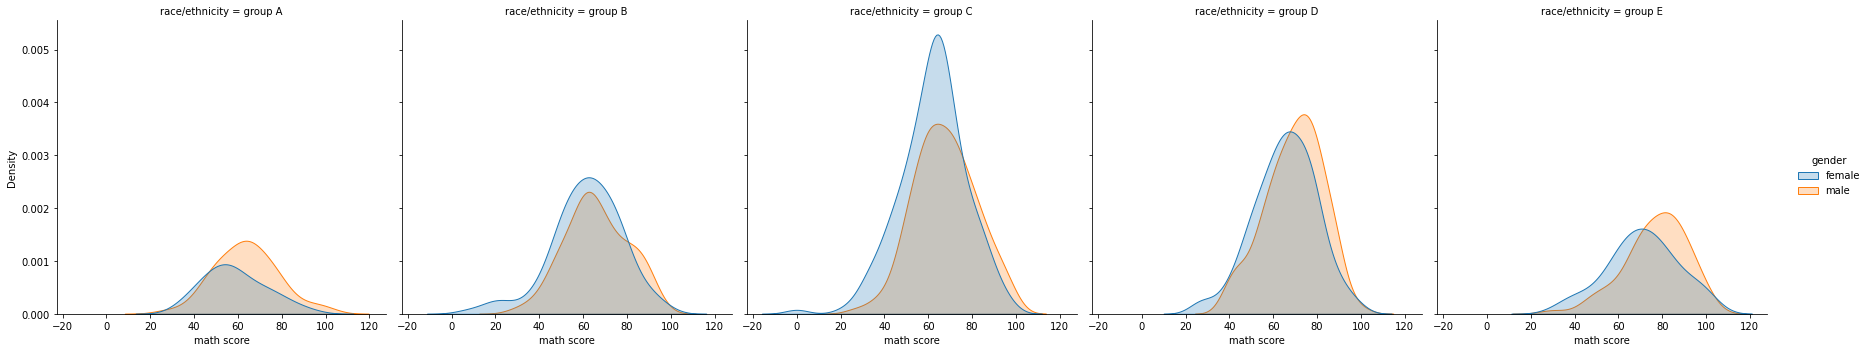

In [192]:
sns.displot(x="math score", 
            hue="gender", 
            data=student,
            col='race/ethnicity', 
            kind='kde', 
            fill=True,
            # hist, kde (default), ecdf
            
            col_order=sorted(student['race/ethnicity'].unique())
           )

## relplot: relational

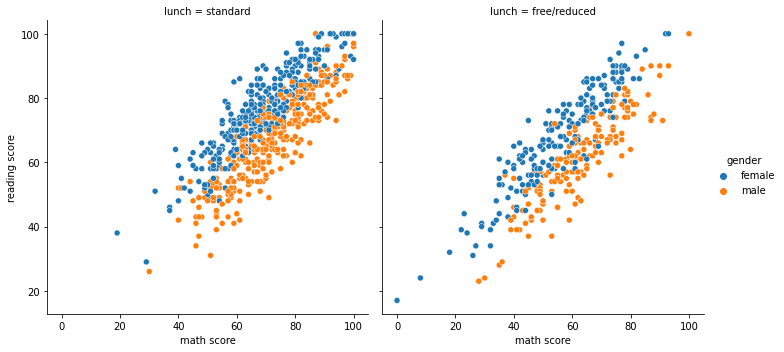

In [193]:
sns.relplot(x="math score", 
            y='reading score', 
            hue="gender", 
            data=student,
            col='lunch')

## lmplot: regression

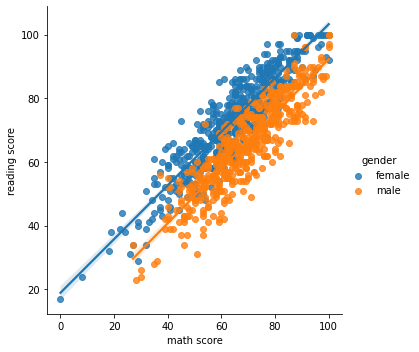

In [194]:
sns.lmplot(x="math score", 
           y='reading score', 
           hue="gender", 
           data=student)